<div class="alert alert-block alert-info">
Singapore Management University<br>
CS105 Statistical Thinking for Data Science, 2024/25 Term 2
</div>

# CS105 Group Project Submission (Part I)

-----
Provide your team details, including section, team number, team members, and the name of the dataset. 
Complete all of the following sections. For any part requiring code to derive your answers, please create a code cell immediately below your response and run the code.
To edit any markdown cell, double click the cell; after editing, execute the markdown cell to collapse it.
<br>
-----

## Declaration

<span style="color:red">By submitting this notebook, we declare that **no part of this submission is generated by any AI tool**. We understand that AI-generated submissions will be considered as plagiarism, and just like other plagirisum cases, disciplinary actions will be imposed.</span>

#### Section:   G5
#### Team:      T1
#### Members:
1. Zachary Tay
2. Bryan Lee
3. Ang Qi Long
4. Jonathan Wong
5. Swayam Jain

#### Dataset: Employee

In [352]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

df = pd.read_csv('employee.csv')

<a id="menu"></a>
#### Table of Content


1. [Overview of Dataset](#part1)
2. [Data Pre-processing](#part2)
3. [Exploratory Analysis and Visualization](#part3)

<a id="part1"></a>

## Part I: Exploratory Data Analysis (EDA) [8% of final grade]

<a id="part1"></a>
### 1. Overview of dataset [15% of Part I]
a. [Background](#part1a) <br>
b. [Size](#part1b) <br>
c. [Variables](#part1c)

_[(Back Top)](#menu)_

### **a.** Summarise the background of the dataset [limited to 50 words]

<div style="text-align: justify;">
This dataset contains <b>HR data of all employees under a sales team</b>. The data includes <b>personal and employment details</b>, <b>total career sales acquired</b> and <b>latest quarterly rating</b>. An employee’s data is <b>captured at the beginning of each month</b>, either <b>up to the latest month</b> (Dec 2017) or <b>when they quit</b>.
</div>


<a id="part1b"></a>

### **b.** State the size of the dataset 

**Size**
- **Rows**: 2381
- **Columns**: 13


In [353]:
n_rows, n_cols = df.shape
print(f"{n_rows} Rows")
print(f"{n_cols} Columns")

2381 Rows
13 Columns


<a id="part1c"></a> [(Back)](#part1)

### **c.** For each variable, describe what it represents and its data type (numerical or categorical)

**Date**
- **Type**: Categorical (?Nominal?)<br>
- **Info**: The date when the specific row’s data is recorded 

**Emp_ID**
- **Type**: Categorical (Nominal)<br>
- **Info**: The unique ID of the employee

**Age**
- **Type**: Numerical (Discrete)<br>
- **Info**: The age of the employee
  
**Gender**
- **Type**: Categorical (Nominal)<br>
- **Info**: The employee’s gender (Male or Female)

**City**
- **Type**: Categorical (?)<br>
- **Info**: The city where the employees works in (C1, C2, ..., C29)

**Education**
- **Type**: Categorical (Ordinal)<br>
- **Info**: Highest education of the employee (College, Bachelor, Master)

**Salary**
- **Type**: Numerical (Discrete)<br>
- **Info**: Current salary of the employee excluding bonus 

**Join_Date**
- **Type**: Categorical (?Nominal?)<br>
- **Info**: The date when the employee joins the company

**Last_Work_Date**
- **Type**: Categorical (?Nominal?)<br>
- **Info**: The data when the employee leaves the company, otherwise empty if employee has not quit

**Join_Designation**
- **Type**: Categorical (Ordinal)<br>
- **Info**: Designation level when the employee joined the company (1, 2, 3, 4, 5)

**Designation**
- **Type**: Categorical (Ordinal)<br>
- **Info**: Current designation level of the employee (1, 2, 3, 4, 5)

**Total_Sales**
- **Type**: Numerical (Discrete)<br>
- **Info**: Total sales generated by the employee since joining the team

**Quarterly_Rating**
- **Type**: Categorical (Ordinal)<br>
- **Info**: Last quarterly performance rating (1, 2, 3, 4)


[(Back)](#part1) <a id="part2"></a>

*****
## 2. Data pre-processing [35% of Part I]
a. [Missing Data](#part2a) <br>
b. [Outlier](#part2b) <br>
c. [Encoding](#part2c)                                   

_[(Back Top)](#menu)_

<a id="part2a"></a>

### **a.** For each variable, determine the percentage of missing data. For any column with missing data, describe how you resolve the issue. Clearly state any assumption you made.

| Variable w/ Missing Data | Count | Percentage |
| :---------------- | :------: | ----: |
| Join_Date | 118 | 4.96% |
| Last_Work_Date | 765 | 32.13% |
| Join_Designation | 105 | 4.41% |  



In [354]:
def displayMissing() :
    missing_count = df.shape[0] - df.count()              # total rows - rows with non-null values
    missing_percent = (missing_count / df.shape[0] * 100) # missing rows / total rows

    missing_data = pd.DataFrame({'Count': missing_count, 'Percentage': round(missing_percent,2)})
    missing_data = missing_data[missing_data['Count'] > 0]  # filter out variable w/o missing data

    return missing_data

displayMissing()

,Count,Percentage
Join_Date,118,4.96
Last_Work_Date,765,32.13
Join_Designation,105,4.41


#### **Join Date**
- **Resolution**: Drop all rows with missing `Join_Date`
- **Reason**: As data of an employee is updated every month, there is no past record to check for their join date. We therefore cannot reasonably accertain when they joined the sales team. Additionally, as the duration of employement will impact other variables and the percentage of missing data is not too high (4.96%), we opted to drop these rows with missing `Join_Date`
- **Assumption(s)**:
    - Each employee will only have one Emp_ID unique to them
    - An employee who had quit will not join the sales team again nor gain a new Emp_ID

In [355]:
df.dropna(subset=['Join_Date'], inplace = True)         # drop all rows with null values under Join_Date
displayMissing()                                        # Join_Date count is 0 (LWD & JD are affected)

,Count,Percentage
Last_Work_Date,728,32.17
Join_Designation,102,4.51


#### **Last Work Date**
- **Resolution**: For rows with missing `Last_Work_Date`,
    - If `Date` is before 1/12/2017, drop rows
    - If `Date` is 1/12/2017, impute rows with 31/12/2017
- **Reason**: 
    - For rows before Dec 2017, an older `Date` suggests that the employee is no longer with the sales team. The employee may quit on anyday within a given month and make any number of sales in that period too, thus affecting the other variables. As we again cannot reasonably accertain when the employee quit and number of affected is not too high (24, 1.06%), we opted to drop these rows with missing 'Last_Work_Date`
    - For rows during Dec 2027, `Last_Work_Date` being blank indicates that the employee has not quit in that given month. As such, we can state that the date they last worked (or are employed) is 31 Dec 2017 and opted to impute with this date.
- **Assumption(s)**: 
    - There are no other employees who quit within Dec 2017 beyond those given in the dataset 

In [356]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

unknownLastDate = df[(df['Last_Work_Date'].isnull()) & (df['Date'] < '2017-12-01')].shape[0]
print("Unknown Last Date:", unknownLastDate, round(unknownLastDate / df.shape[0] * 100, 2), "%")

stillWorking = df[(df['Last_Work_Date'].isnull()) & (df['Date'] == '2017-12-01')].shape[0]
print("Still Working:", stillWorking, round(stillWorking / df.shape[0] * 100, 1), "%")

Unknown Last Date: 24 1.06 %
Still Working: 704 31.1 %


In [357]:
unknownLastDate = df[(df['Last_Work_Date'].isnull()) & (df['Date'] < '2017-12-01')]     # splice out rows where Date is before Dec 2017
df.drop(unknownLastDate.index, inplace=True)                                            # use index of unknownLastDate and drop row

df.fillna({"Last_Work_Date": "31/12/2017"}, inplace=True)                               # impute rows of employees still working with sales team
                                                                                        # with last day of month (31 Dec 2017)

displayMissing()                                                                        # Last_Work_Date is 0 (JD affected)

,Count,Percentage
Join_Designation,100,4.47


#### **Join Designation**
- **Resolution**: For rows with missing `Join_Designation`, 
    - If `Designation == 1`, impute rows with 1
    - If `Designation > 1`, drop these rows
- **Reason**: 
    - As `Designation` captures the current designation level of an employee when their data was recorded, if current designation level is 1, then we can definitvely deduce that the `Join_Designation` is 1 too. 
    - For any higher current designation level than 1, we again cannot reasonably accertain their initial designation level as it likely varies with other variables. As the number and percentage of rows missing data where `Designation > 1`  is not too high (78, 3.48%), we opted to drop these rows and impute those where where `Designation == 1` is 1 (22, 0.983%) with 1  
- **Assumption(s)**: -  

In [358]:
cdIs1 = df[(df['Join_Designation'].isnull()) & (df['Designation'] == 1)].shape[0]
cdNot1 = df[(df['Join_Designation'].isnull()) & (df['Designation'] != 1)].shape[0]

print("(Current) Designation = 1:", cdIs1, round(cdIs1 / df.shape[0] * 100, 3), "%")
print("(Current) Designation > 1:", cdNot1, round(cdNot1 / df.shape[0] * 100, 2), "%")

(Current) Designation = 1: 22 0.983 %
(Current) Designation > 1: 78 3.48 %


In [359]:
cdNot1 = df[(df['Join_Designation'].isnull()) & (df['Designation'] != 1)]   # splice out rows where designation > 1
df.drop(cdNot1.index, inplace=True)                                         # use index of cdNot1 and drop row
# print(cdNot1.shape[0])

cdIs1 = df[(df['Join_Designation'].isnull()) & (df['Designation'] == 1)]    # splice out rows where designation is 1
# print(cdIs1.iloc[cdIs1[cdIs1["Emp_ID"]==21].index])
df.loc[cdIs1.index, "Join_Designation"] = 1                                 # use index of cdIs1 and impute row with 1
# print(cdIs1.shape[0])
# print(df.iloc[df[df["Emp_ID"]==21].index])

df['Join_Designation'] = df['Join_Designation'].astype(int)                 # convert imputed float (1.0) to int (1)
# print(df.iloc[df[df["Emp_ID"]==21].index])
displayMissing()                                                            # Join_Designation count is 0

,Count,Percentage


**Size after Cleaning**
- **Rows**: 2161
- **Columns**: 13

In [360]:
n_rows, n_cols = df.shape
print(f"{n_rows} Rows")
print(f"{n_cols} Columns")

2161 Rows
13 Columns


<a id="part2b"></a> [(Back)](#part2)


### **b.** For each variable, identify outliers (if any) and describe how you resolve the issue. Clearly state any assumption you made.


#### **Age**
There exists 33 outlier rows with `Age` above upper bound.
- **Resolution**: Remove the row with the outlier with the employee of the oldest age.
- **Reason**: This outlier is siginficantly further away from the rest of the cluster
- **Assumption(s)**: 
    - An employee is not forced to quit or retire once they reach a certain age

Rows below lower bound (17): 0
Rows below upper bound (49): 33


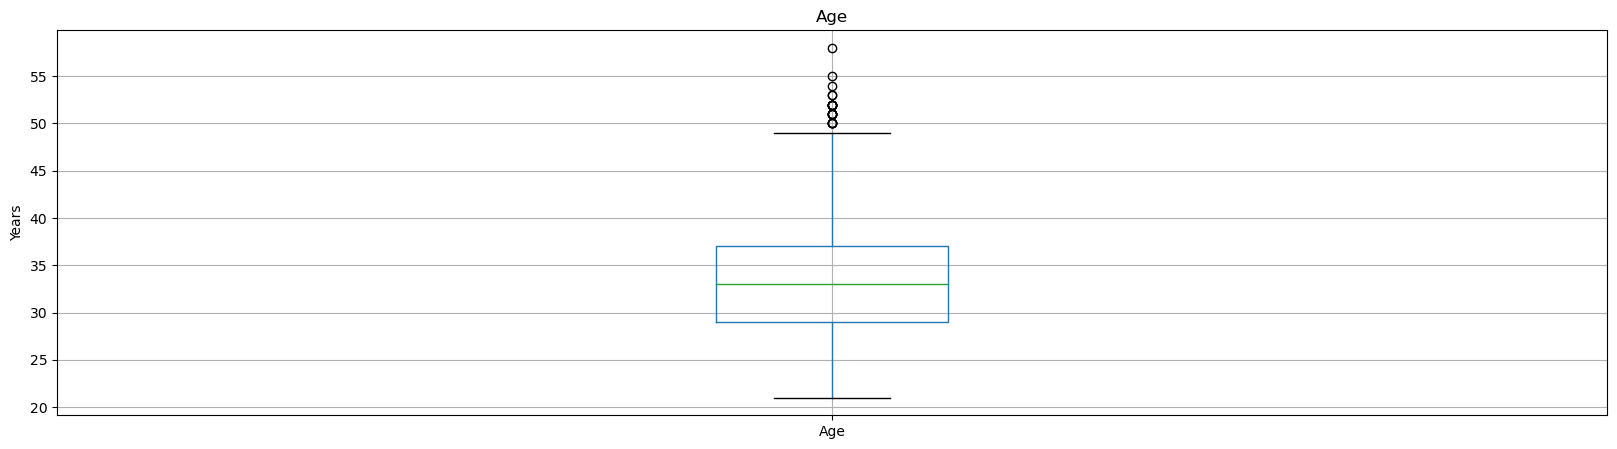

In [361]:
# Identify outliers
Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)
lower = Q1 - 1.5 * (Q3-Q1)                          # lower bound is 17 years old                
upper = Q3 + 1.5 * (Q3-Q1)                          # upper bound is 49 years old

below = df[df['Age'] <= lower].shape[0]
above = df[df['Age'] >= upper].shape[0]

print(f"Rows below lower bound ({int(lower)}): {below}")
print(f"Rows below upper bound ({int(upper)}): {above}")

plt.figure(figsize=(20,5))
df[["Age"]].boxplot()
plt.title("Age")
plt.ylabel("Years")
plt.show()

In [362]:
# drop the oldest person
max_age = df.Age.max()
age_outlier = df[df["Age"] == max_age]
age_outlier
df.drop(age_outlier.index, inplace=True)

Rows below lower bound (17): 0
Rows below upper bound (49): 32


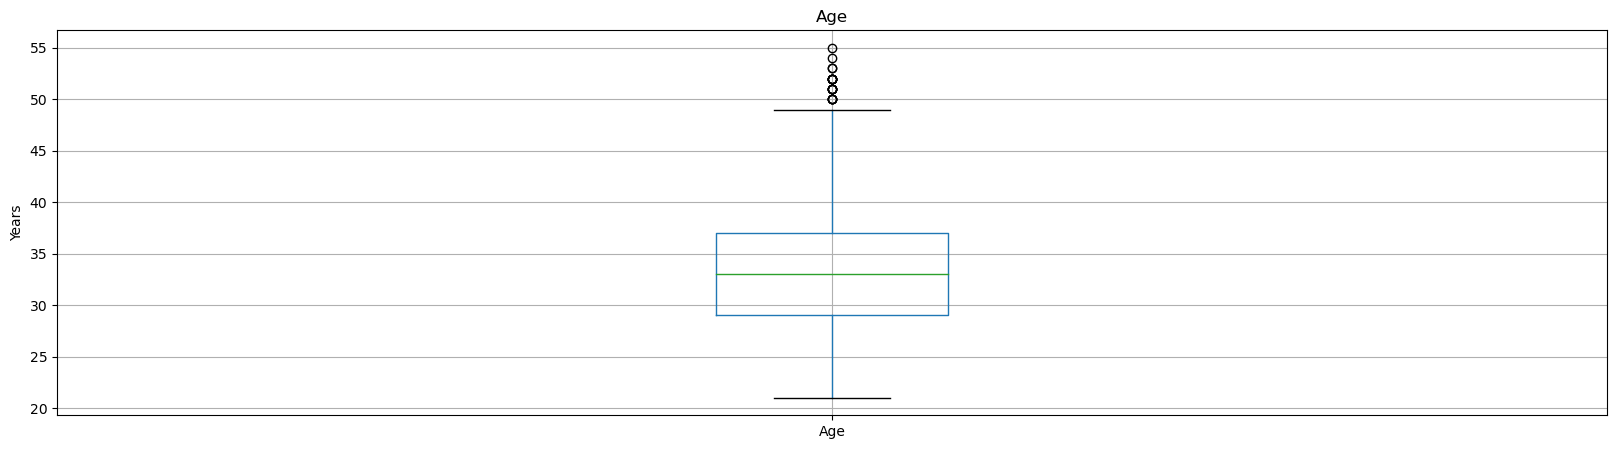

In [363]:
Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)
lower = Q1 - 1.5 * (Q3-Q1)                          # lower bound is 17 years old                
upper = Q3 + 1.5 * (Q3-Q1)                          # upper bound is 49 years old

below = df[df['Age'] <= lower].shape[0]
above = df[df['Age'] >= upper].shape[0]

print(f"Rows below lower bound ({int(lower)}): {below}")
print(f"Rows below upper bound ({int(upper)}): {above}")

plt.figure(figsize=(20,5))
df[["Age"]].boxplot()
plt.title("Age")
plt.ylabel("Years")
plt.show()

In [364]:
n_rows, n_cols = df.shape
print(f"{n_rows} Rows")
print(f"{n_cols} Columns")

2160 Rows
13 Columns


#### **Salary**
There exists 50 outlier rows with `Salary` above upper bound.
- **Resolution**:
    - Drop the 3 outliers separated from the cluster
    - Keep the outliers within the cluster
- **Reason**:
    - As there is only 3 such outliers that are much further away from the rest of the points, we opted to drop them.
    - Likely corresponds to employee with higher designation level. As such, we should keep these outliers for our data analysis
- **Assumption(s)**: -

Rows below lower bound ($-16428.125): 0
Rows below upper bound ($129902.875): 50


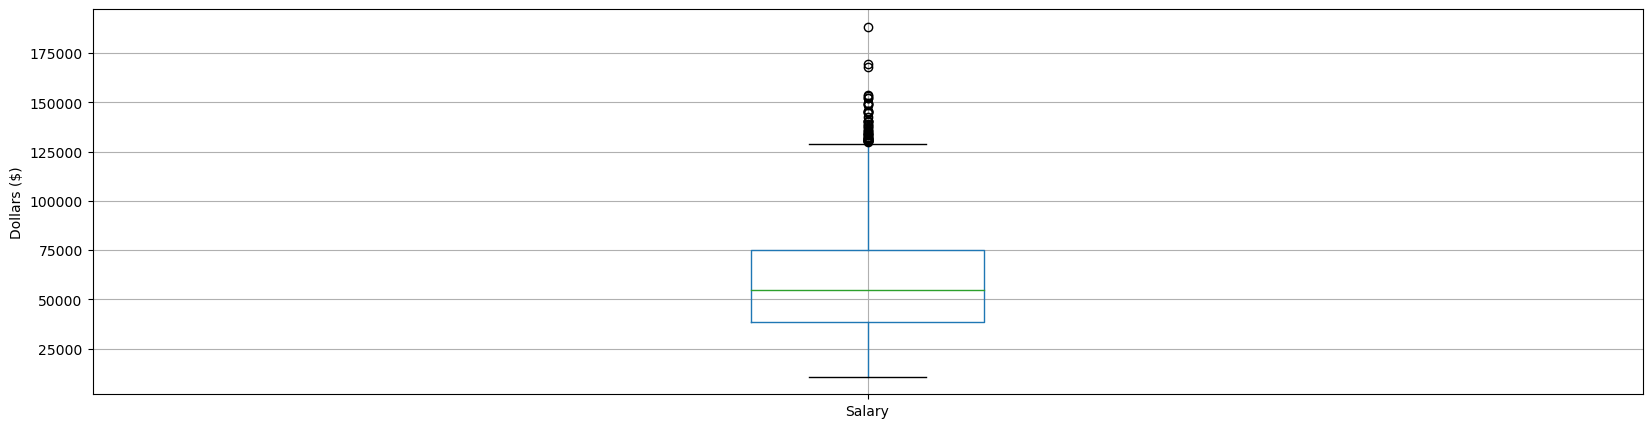

,Emp_ID,Salary
257,308,188418
2063,2420,169549
2048,2405,167758
1831,2154,153766
945,1111,153109


In [365]:
# Identify outliers for salary

Q1 = df["Salary"].quantile(0.25)
Q3 = df["Salary"].quantile(0.75)
lower = Q1 - 1.5 * (Q3-Q1)                          # lower bound is $-16409.25                
upper = Q3 + 1.5 * (Q3-Q1)                          # upper bound is $129844.75

below = df[df['Salary'] <= lower].shape[0]
above = df[df['Salary'] >= upper].shape[0]

print(f"Rows below lower bound (${lower}): {below}")
print(f"Rows below upper bound (${upper}): {above}")

plt.figure(figsize=(20,5))
df[["Salary"]].boxplot()
plt.ylabel("Dollars ($)")
plt.show()

df.sort_values('Salary', ascending=False)[["Emp_ID", "Salary"]].head(5)

In [366]:
# Drop the 3 outliers
top_3_outliers = df.sort_values("Salary", ascending=False).head(3)
df.drop(top_3_outliers.index, inplace=True)

#### **Total Sales Acquired**

There exists 10 rows with negative `Total_Sales_Acquired`.
- **Resolution**: Drop such rows with negative `Total_Sales_Acquired`
- **Reason**: Total sales acquired should minimally be 0, not negative. We should not absolute these negative values or impute with 0 as we cannot reasonably accertain true total sales.
- **Assumption(s)**:
    - Dataset does not keep track whether an employee caused a loss of sales

There exists 307 outlier rows with `Total_Sales_Acquired` above upper bound.
- **Resolution**: Drop the top 3 rows that have outliers.
- **Reason**: These outliers are siginficantly further away from the rest of the data points, hence, we have decided to drop them. 
- **Assumption(s)**: -

Rows with negative sales: 10
Rows below lower bound (-6039540.0): 0
Rows below upper bound (10065900.0): 307


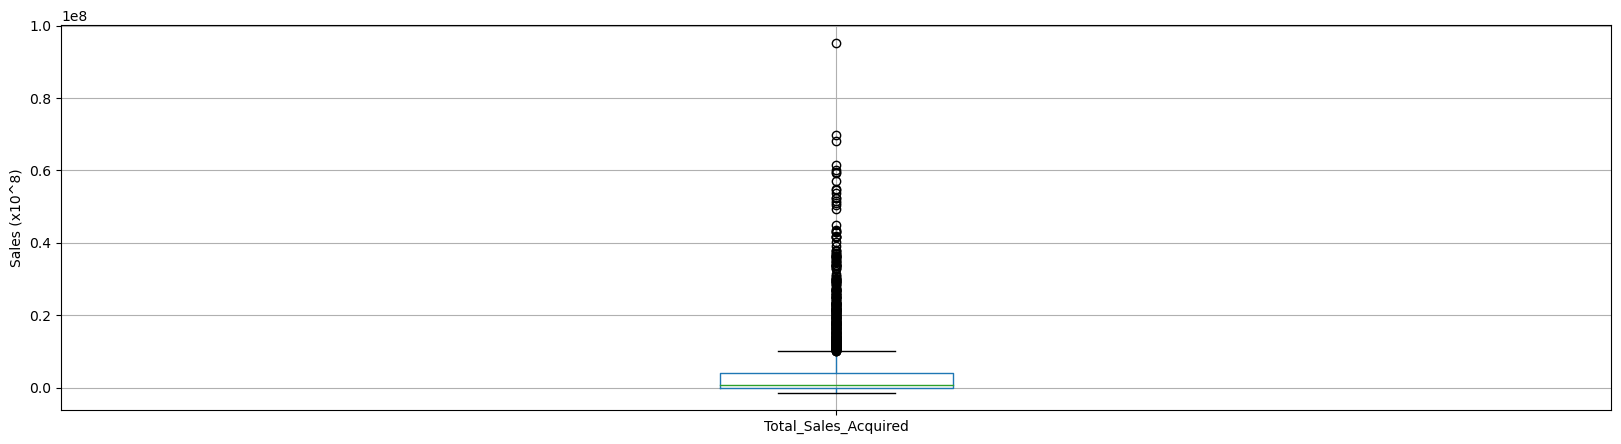

,Emp_ID,Total_Sales_Acquired
2153,2522,95331060
18,26,69867900
1883,2210,68074911
2351,2753,61583040
1395,1638,60153830


In [367]:
Q1 = df["Total_Sales_Acquired"].quantile(0.25)
Q3 = df["Total_Sales_Acquired"].quantile(0.75)
lower = Q1 - 1.5 * (Q3-Q1)                          # lower bound is                 
upper = Q3 + 1.5 * (Q3-Q1)                          # upper bound is 

negative = df[df['Total_Sales_Acquired'] < 0].shape[0]
below = df[df['Total_Sales_Acquired'] <= lower].shape[0]
above = df[df['Total_Sales_Acquired'] >= upper].shape[0]

print(f"Rows with negative sales: {negative}");
print(f"Rows below lower bound ({lower}): {below}")
print(f"Rows below upper bound ({upper}): {above}")

plt.figure(figsize=(20,5))
df[["Total_Sales_Acquired"]].boxplot()
plt.ylabel("Sales (x10^8)")
plt.show()

df.sort_values('Total_Sales_Acquired', ascending=False)[["Emp_ID", "Total_Sales_Acquired"]].head(5)

In [368]:
# Drop rows with negative sales
negativeSales = df[df['Total_Sales_Acquired'] < 0]  
df.drop(negativeSales.index, inplace=True)

In [369]:
# Drop the 3 outliers
top_3_outliers = df.sort_values("Total_Sales_Acquired", ascending=False).head(3)
df.drop(top_3_outliers.index, inplace=True)

**Size after Handling Outliers**
- **Rows**: 2144
- **Columns**: 13

In [370]:
n_rows, n_cols = df.shape
print(f"{n_rows} Rows")
print(f"{n_cols} Columns")

2144 Rows
13 Columns


<a id="part2c"></a> [(Back)](#part2)

### **c.** For categorical variables, perform the necessary encoding.

#### **Emp ID, Join Designation, Designation, Quarterly Rating**

These categorical variables are stored as `int` and therefore need not be encoded.

#### **Gender**
Binary (nominal) variable; To apply binary encoding 
|Value|Encoded|
|:-:|:-:|
|Male|0|
|Female|1|

In [371]:
gender_encoding = {"Male":0, "Female":1} 
df["Gender_Encoded"] = df["Gender"].map(gender_encoding)  # map Gender column using encoding

df[["Date", "Emp_ID", "Gender", "Gender_Encoded"]].sample(5)

,Date,Emp_ID,Gender,Gender_Encoded
185,2016-06-01,217,Male,0
1846,2016-08-01,2170,Male,0
2109,2017-08-01,2474,Male,0
2331,2017-12-01,2729,Male,0
797,2016-05-01,937,Male,0


#### **City**
Ordinal variable; To apply ordinal encoding
Extract city number
|Value|Encoded|
|:-:|:-:|
|C1|1|
|C2|2|
|...|...|
|C28|28|
|C29|29|

In [372]:
city_encoding = {"C1":1, "C2":2, "C3":3, "C4":4 ,"C5":5 ,"C6":6,"C7":7,"C8":8,"C9":9,"C10":10,"C11":11, "C12":12, "C13":13, "C14":14, "C15":15 ,"C16":16 ,"C17":17,"C18":18,"C19":19,"C20":20,"C21":21,"C22":22, "C23":23, "C24":24, "C25":25, "C26":26 ,"C27":27 ,"C28":28,"C29":29}

df["City_Encoded"] = df["City"].map(city_encoding) #map City column using encoding

df[["Date", "Emp_ID", "City", "City_Encoded"]].sample(5)


,Date,Emp_ID,City,City_Encoded
530,2016-08-01,613,C1,1
814,2017-06-01,955,C10,10
2301,2017-05-01,2698,C21,21
2072,2017-02-01,2429,C21,21
1780,2016-02-01,2094,C15,15


#### **Education**
Ordinal variable; To apply ordinal encoding
|Value|Encoded|
|:-:|:-:|
|College|0|
|Bachelor|1|
|Master|2|

In [373]:
education_encoding = {"College":0, "Bachelor":1, "Master":2} 
df["Education_Encoded"] = df["Education"].map(education_encoding)  # map Gender column using encoding

df[["Date", "Emp_ID", "Education", "Education_Encoded"]].sample(5)

,Date,Emp_ID,Education,Education_Encoded
1553,2017-12-01,1828,College,0
2293,2017-12-01,2690,Master,2
897,2017-06-01,1058,College,0
2073,2017-08-01,2430,College,0
1981,2017-09-01,2326,College,0


#### **Date**
Convert date string to pandas Timestamp <br>
Splice month and year from `Date`<br>
Day is not needed as data is always captured at beginning of each month (i.e. 1st)

In [374]:
# df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)  # already converted above

df["Recorded_Month"] = df['Date'].dt.month
df["Recorded_Year"] = df['Date'].dt.year

df[["Date", "Emp_ID", "Recorded_Month", "Recorded_Year"]].sample(5)

,Date,Emp_ID,Recorded_Month,Recorded_Year
416,2017-05-01,488,5,2017
1903,2017-06-01,2232,6,2017
869,2017-11-01,1021,11,2017
1377,2017-12-01,1619,12,2017
1038,2017-01-01,1219,1,2017


#### **Join Date**
Convert date string to pandas Timestamp <br>
Splice day, month and year from `Join_Date`<br>

In [375]:
df['Join_Date'] = pd.to_datetime(df['Join_Date'], dayfirst=True)  

df["Join_Day"] = df['Join_Date'].dt.day
df["Join_Month"] = df['Join_Date'].dt.month
df["Join_Year"] = df['Join_Date'].dt.year

df[["Emp_ID", "Join_Date", "Join_Day", "Join_Month", "Join_Year"]].sample(5)

,Emp_ID,Join_Date,Join_Day,Join_Month,Join_Year
117,139,2016-10-31,31,10,2016
2348,2749,2015-10-28,28,10,2015
2021,2373,2015-12-04,4,12,2015
752,883,2015-10-19,19,10,2015
842,991,2017-01-04,4,1,2017


#### **Last Work Date**
Convert date string to pandas Timestamp <br>
Splice day, month and year from `Last_Work_Date`<br>

In [376]:
df['Last_Work_Date'] = pd.to_datetime(df['Last_Work_Date'], dayfirst=True)  

df["LWD_Day"] = df['Last_Work_Date'].dt.day
df["LWD_Month"] = df['Last_Work_Date'].dt.month
df["LWD_Year"] = df['Last_Work_Date'].dt.year

df[["Emp_ID", "Last_Work_Date", "LWD_Day", "LWD_Month", "LWD_Year"]].sample(5)

,Emp_ID,Last_Work_Date,LWD_Day,LWD_Month,LWD_Year
625,731,2016-03-03,3,3,2016
1769,2083,2017-05-15,15,5,2017
1422,1671,2017-01-06,6,1,2017
513,596,2016-05-06,6,5,2016
379,446,2017-12-31,31,12,2017


[(Back)](#part2)
<a id="part3"></a>

----
### 3.	Exploratory analysis and visualization [50% of Part I]
a. [Summary Statistics](#part3a) <br>
b. [Visualisaton](#part3b) <br>
c. [Bi-Variate Analysis](#part3c)

_[(Back Top)](#menu)_

<a id="part3a"></a>

### **a.** For each variable, provide relevant summary statistics

In [377]:
def displayCategorical(column):
    value_counts = df[column].value_counts()
    percentage = (value_counts / df.shape[0]) * 100

    col_data = pd.DataFrame({'Count': value_counts.values, 'Percentage': round(percentage, 2)})    
    return col_data.sort_index()


#### **Date**

In [378]:
displayCategorical("Date")


,Count,Percentage
2016-01-01,78,3.64
2016-02-01,70,3.26
2016-03-01,65,3.03
2016-04-01,45,2.10
2016-05-01,98,4.57
2016-06-01,54,2.52
2016-07-01,50,2.33
2016-08-01,44,2.05
2016-09-01,77,3.59
2016-10-01,55,2.57


#### **Emp_ID**

In [379]:
unique_count = df.Emp_ID.nunique()
n_rows, n_cols = df.shape
print(f"# unique employee IDs : {unique_count}")
print(f"# rows : {n_rows}")

# unique employee IDs : 2144
# rows : 2144


#### **Age**

In [380]:
df[["Age"]].describe()

,Age
count,2144.00000
mean,33.61334
std,5.95419
min,21.00000
25%,29.00000
50%,33.00000
75%,37.00000
max,55.00000


#### **Gender**

In [381]:
displayCategorical("Gender")

,Count,Percentage
Female,879,41.0
Male,1265,59.0


#### **City**

In [382]:
value_counts = df["City"].value_counts()                # Cannot sort normally by City(str) as "C10" < "C2" 
percentage = (value_counts / df.shape[0]) * 100
col_data = pd.DataFrame({'Code':df["City_Encoded"].value_counts().index,'Count': value_counts.values, 'Percentage': round(percentage, 2)})    
col_data.sort_values(by="Code").drop(columns=["Code"]) 

,Count,Percentage
C1,75,3.50
C2,65,3.03
C3,70,3.26
C4,72,3.36
C5,68,3.17
C6,70,3.26
C7,64,2.99
C8,73,3.40
C9,72,3.36
C10,78,3.64


#### **Education**

In [383]:
unique_count = df.Education.nunique()
print(f"# unique types of education : {unique_count}")

displayCategorical("Education")

# unique types of education : 3


,Count,Percentage
Bachelor,722,33.68
College,699,32.60
Master,723,33.72


#### **Salary**

In [384]:
df[["Salary"]].describe()

,Salary
count,2144.000000
mean,58523.044310
std,27954.690734
min,10747.000000
25%,38414.250000
50%,54553.500000
75%,74855.000000
max,153766.000000


#### **Join Date**

In [385]:
unique_count = df.Join_Date.nunique()
n_rows, n_cols = df.shape
print(f"# unique join dates : {unique_count}")
print(f"# rows : {n_rows}")
print()

classes = df.Join_Date.unique()
print(f"Values of join dates : {classes}")

all_join_dates = df.Join_Date.mode()[0]  # note that .mode() returns a series so we need to access the first element using [0]
df.Join_Date.value_counts()  # do a count to verify the mode

# unique join dates : 826
# rows : 2144

Values of join dates : ['2015-12-24T00:00:00.000000000' '2016-12-07T00:00:00.000000000'
 '2016-01-09T00:00:00.000000000' '2017-07-31T00:00:00.000000000'
 '2017-09-19T00:00:00.000000000' '2017-12-07T00:00:00.000000000'
 '2016-06-29T00:00:00.000000000' '2012-05-28T00:00:00.000000000'
 '2017-10-16T00:00:00.000000000' '2015-11-30T00:00:00.000000000'
 '2015-03-06T00:00:00.000000000' '2016-10-25T00:00:00.000000000'
 '2015-05-12T00:00:00.000000000' '2015-05-25T00:00:00.000000000'
 '2014-10-30T00:00:00.000000000' '2015-05-20T00:00:00.000000000'
 '2016-10-03T00:00:00.000000000' '2017-07-04T00:00:00.000000000'
 '2017-03-07T00:00:00.000000000' '2016-07-01T00:00:00.000000000'
 '2017-05-16T00:00:00.000000000' '2016-12-06T00:00:00.000000000'
 '2017-08-08T00:00:00.000000000' '2016-11-08T00:00:00.000000000'
 '2016-07-04T00:00:00.000000000' '2015-10-20T00:00:00.000000000'
 '2015-07-13T00:00:00.000000000' '2017-09-25T00:00:00.000000000'
 '2017-05-29T00:00:00.0000

2017-07-31    29
2017-09-28    27
2017-05-29    19
2016-10-31    18
2017-05-01    16
              ..
2017-06-24     1
2014-10-21     1
2012-12-06     1
2013-12-11     1
2017-08-28     1
Name: Join_Date, Length: 826, dtype: int64

#### **Last Work Date**

In [386]:
unique_count = df.Last_Work_Date.nunique()
n_rows, n_cols = df.shape
print(f"# unique last work dates : {unique_count}")
print(f"# rows : {n_rows}")
print()

classes = df.Last_Work_Date.unique()
print(f"Values of last work dates : {classes}")

all_join_dates = df.Last_Work_Date.mode()[0]  # note that .mode() returns a series so we need to access the first element using [0]
df.Last_Work_Date.value_counts()  # do a count to verify the mode

# unique last work dates : 484
# rows : 2144

Values of last work dates : ['2016-03-11T00:00:00.000000000' '2017-04-27T00:00:00.000000000'
 '2016-03-07T00:00:00.000000000' '2017-12-31T00:00:00.000000000'
 '2017-11-15T00:00:00.000000000' '2016-12-21T00:00:00.000000000'
 '2017-11-25T00:00:00.000000000' '2016-02-22T00:00:00.000000000'
 '2016-07-20T00:00:00.000000000' '2016-04-30T00:00:00.000000000'
 '2017-03-01T00:00:00.000000000' '2017-02-17T00:00:00.000000000'
 '2017-04-26T00:00:00.000000000' '2016-10-27T00:00:00.000000000'
 '2016-05-23T00:00:00.000000000' '2016-11-29T00:00:00.000000000'
 '2017-11-14T00:00:00.000000000' '2017-05-05T00:00:00.000000000'
 '2017-07-29T00:00:00.000000000' '2017-10-16T00:00:00.000000000'
 '2017-03-15T00:00:00.000000000' '2017-02-14T00:00:00.000000000'
 '2016-05-16T00:00:00.000000000' '2016-02-20T00:00:00.000000000'
 '2017-11-24T00:00:00.000000000' '2016-02-27T00:00:00.000000000'
 '2017-01-21T00:00:00.000000000' '2016-12-23T00:00:00.000000000'
 '2017-07-21T00:

2017-12-31    663
2017-07-29     65
2016-09-22     22
2017-02-17     13
2017-11-28     12
             ... 
2017-02-16      1
2017-06-01      1
2016-11-07      1
2017-11-02      1
2017-10-28      1
Name: Last_Work_Date, Length: 484, dtype: int64

#### **Join Designation**

In [387]:
unique_count = df.Join_Designation.nunique()
print(f"# unique types of join designations : {unique_count}")

displayCategorical("Join_Designation")

# unique types of join designations : 5


,Count,Percentage
1,948,44.22
2,712,33.21
3,443,20.66
4,34,1.59
5,7,0.33


#### **Designation**

In [388]:
unique_count = df.Designation.nunique()
print(f"# unique types of designations : {unique_count}")

displayCategorical("Designation")

# unique types of designations : 5


,Count,Percentage
1,696,32.46
2,758,35.35
3,551,25.70
4,122,5.69
5,17,0.79


#### **Total Sales Acquired**

In [389]:
df[["Total_Sales_Acquired"]].describe()

,Total_Sales_Acquired
count,2.144000e+03
mean,4.431632e+06
std,8.622502e+06
min,0.000000e+00
25%,0.000000e+00
50%,8.151950e+05
75%,4.027398e+06
max,6.158304e+07


#### **Quarterly Rating**

In [390]:
unique_count = df.Quarterly_Rating.nunique()
print(f"# unique types of designations : {unique_count}")

displayCategorical("Quarterly_Rating")

# unique types of designations : 4


,Count,Percentage
1,1576,73.51
2,326,15.21
3,150,7.00
4,92,4.29


<a id="part3b"></a> [(Back)](#part3)

### **b.** For each variable, provide an appropriate visualisation depicting the distribution of its values, and summarize any key observation(s) you made.

#### **Date** <a id="p3b1"></a>
- **Key Observation(s)**:
    - Dec 2017 has the most employees still working (663) and have quit (72)
    - The distribution of employees who quit in a given month appears relatively uniform
    - In 2016, May had the most employees who quit
    - In 2017, July had the most employees who quit
    - In both years, April had the least employees who quit

Still Working in Dec 2017: 663
Quit in Dec 2017: 72


C:\Users\toffe\AppData\Local\Temp\ipykernel_16212\1999677782.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  stillWorking = df[(df['Last_Work_Date']=="31/12/2017")].shape[0]


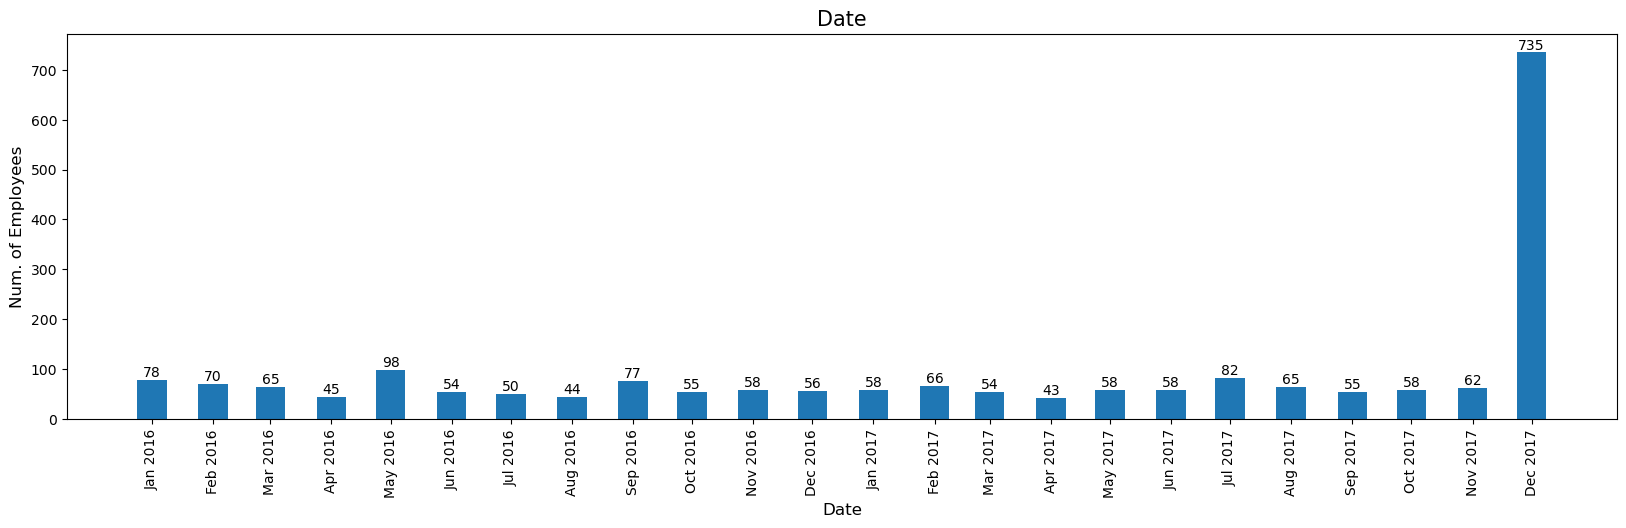

In [391]:
stillWorking = df[(df['Last_Work_Date']=="31/12/2017")].shape[0]
dec2017 = df[(df['Date']=="2017-12-01")].shape[0]
print(f"Still Working in Dec 2017: {stillWorking}")
print(f"Quit in Dec 2017: {dec2017-stillWorking}")

date_data = df["Date"].value_counts(normalize=False)
date_level = date_data.index

plt.figure(figsize=(20,5))
bars = plt.bar(date_level, date_data, width=15)

for bar in bars:                               
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height()}', ha='center', va='bottom', fontsize=10)

plt.title("Date", fontsize=15)
plt.xlabel("Date", fontsize=12)
plt.xticks(date_level, date_level.strftime('%b %Y'), rotation=90, fontsize=10)
plt.ylabel("Num. of Employees", fontsize=12)
plt.show()

#### **Emp ID** <a id="p3b2"></a>
- **Key Observation(s)**:

In [392]:
unique_count_emp = df.Emp_ID.nunique()
n_rows = df.shape[0]

print(f"# Total unique Emp_ID : {unique_count_emp}")
print(f"# Total Rows : {n_rows}")

# Total unique Emp_ID : 2144
# Total Rows : 2144


#### **Age** <a id="p3b3"></a>
- **Key Observation(s)**:
    - The distribution of Age is slightly right-skewed (more data above median)

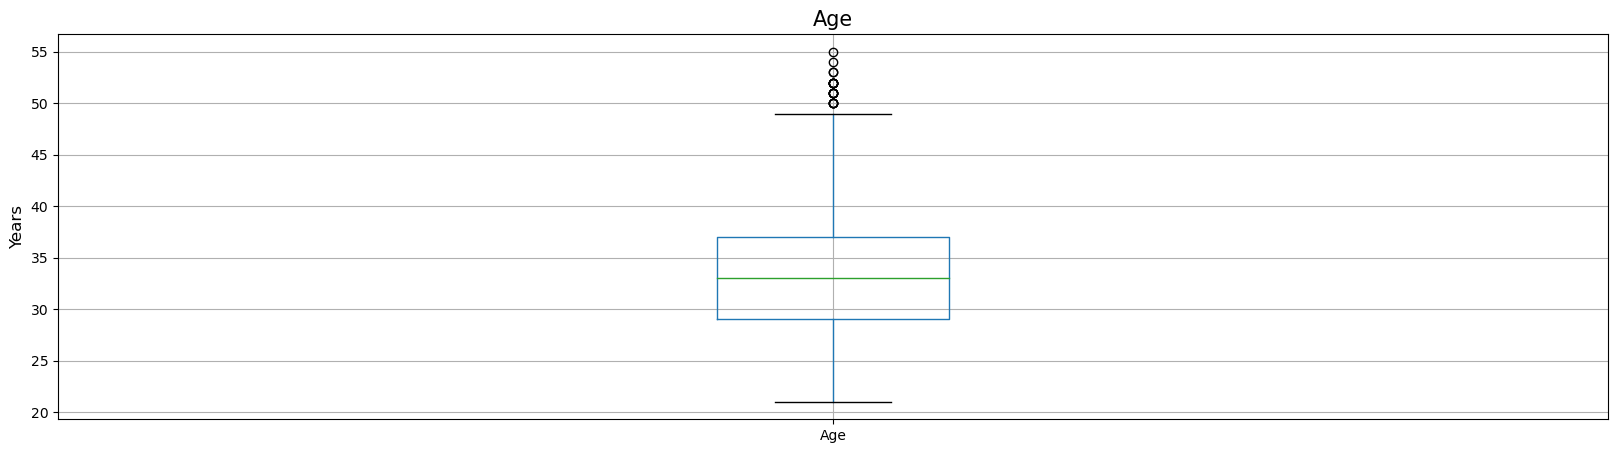

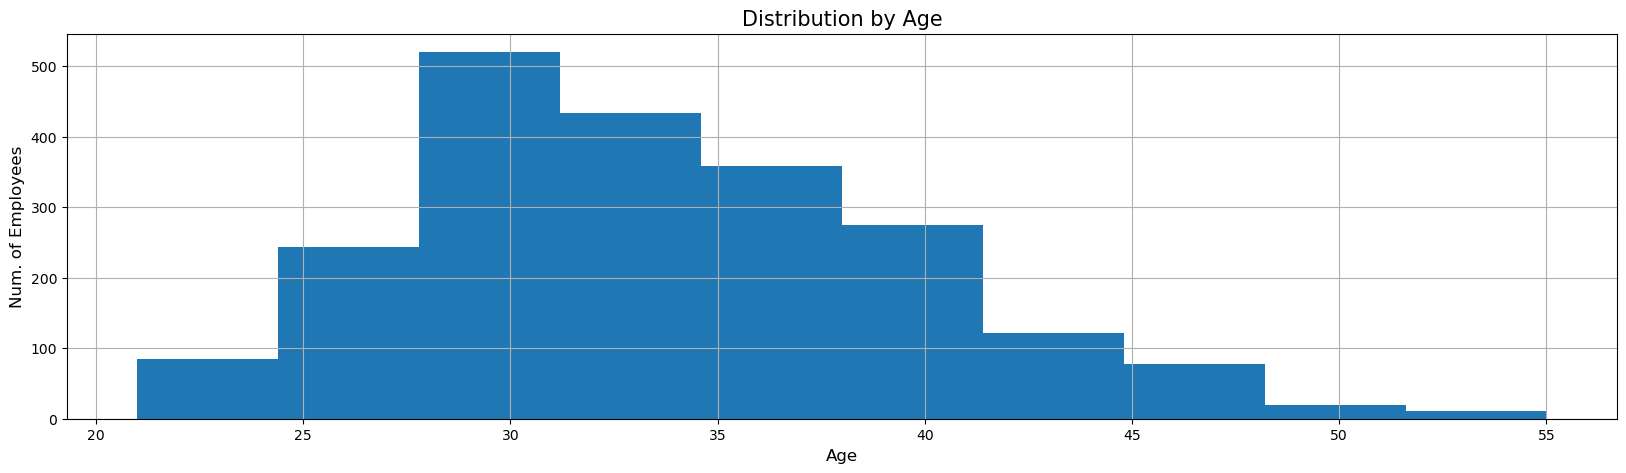

In [393]:
# Boxplot
plt.figure(figsize=(20,5))
df[["Age"]].boxplot()
plt.title("Age", fontsize=15)
plt.ylabel("Years", fontsize=12)
plt.show()

# Histogram
plt.figure(figsize=(20,5))
plt.title("Distribution by Age", fontsize=15)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Num. of Employees", fontsize=12)
df["Age"].hist(bins=10)   
plt.show()

#### **Gender** <a id="p3b4"></a>
- **Key Observation(s)**:
    - There have been more males employees (59%) than female employees (41%)

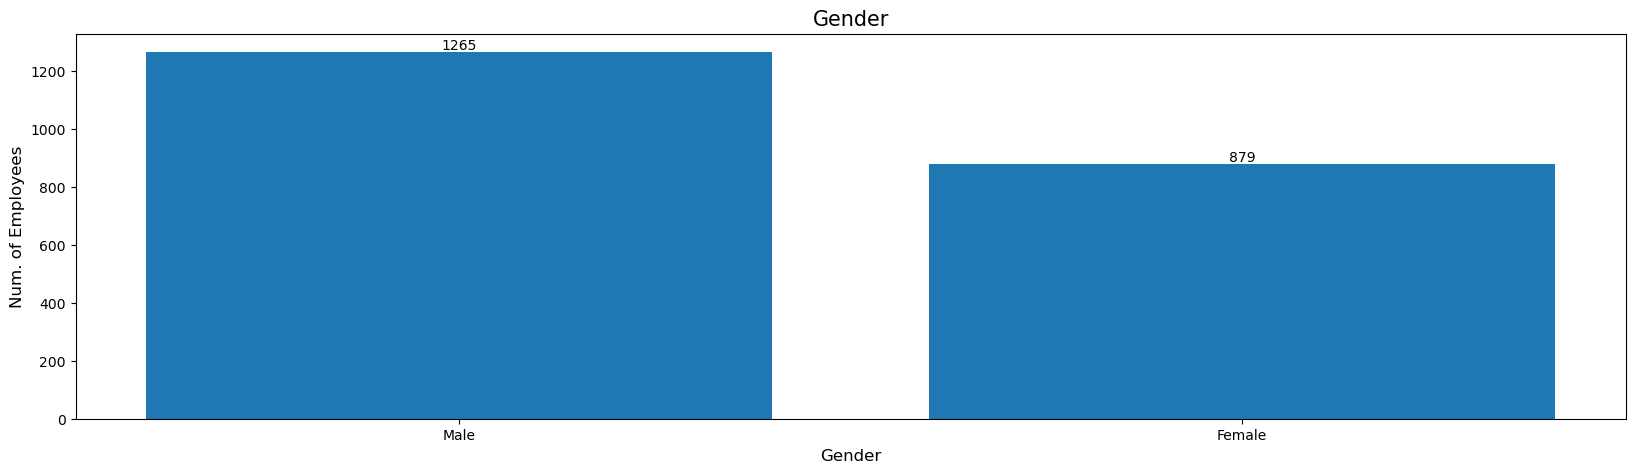

In [394]:
gender_data = df["Gender"].value_counts(normalize=False)
gender_level = gender_data.index

plt.figure(figsize=(20,5))
bars = plt.bar(gender_level, gender_data)

for bar in bars:                               
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height()}', ha='center', va='bottom', fontsize=10)

plt.title("Gender", fontsize=15)
plt.xlabel("Gender", fontsize=12)
# plt.xticks(gender_level, ['Male', 'Female'])
plt.ylabel("Num. of Employees", fontsize=12)
plt.show()

#### **City** <a id="p3b5"></a>
- **Key Observation(s)**: 
    - City C20 has had the greatest number of employees, suggesting it is a significant location
    - The distribution across the other 28 cities appears relatively uniform

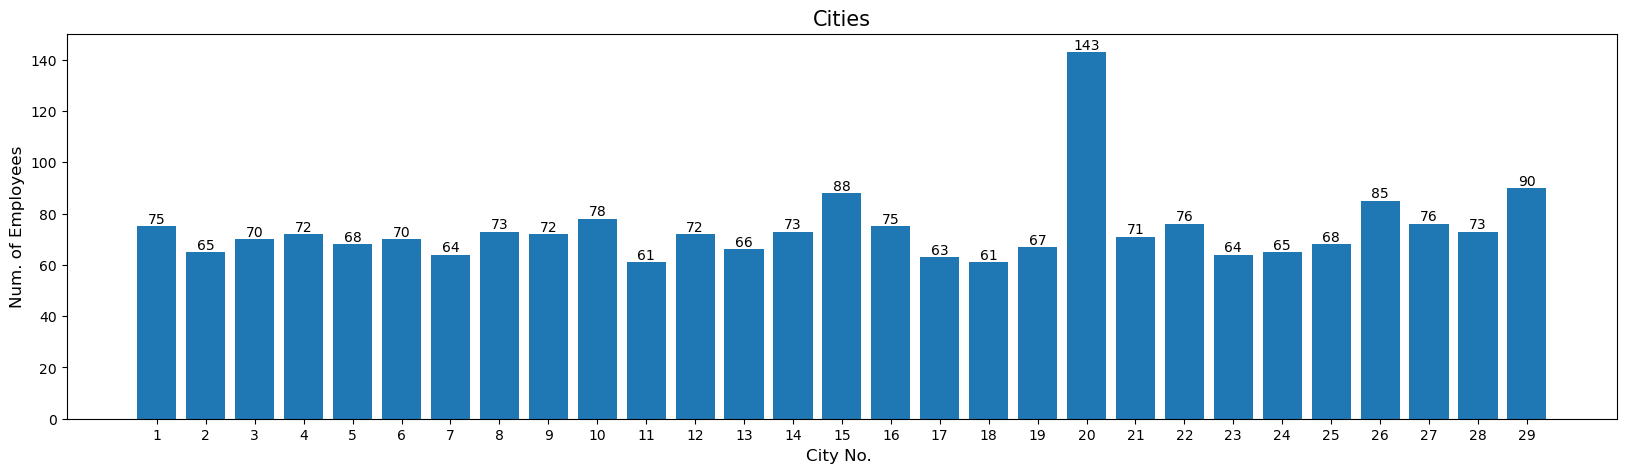

In [395]:
city_data = df["City_Encoded"].value_counts(normalize=False)
city_level = city_data.index

plt.figure(figsize=(20,5))
bars = plt.bar(city_level, city_data)

for bar in bars:                               
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height()}', ha='center', va='bottom', fontsize=10)

plt.title("Cities", fontsize=15)
plt.xlabel("City No. ", fontsize=12)
plt.xticks(range(1, 30))
plt.ylabel("Num. of Employees", fontsize=12)
plt.show()

#### **Education** <a id="p3b6"></a>
- **Key Observation(s)**:
    - The distribution across the 3 education levels is balanced, with College having a slightly lower count

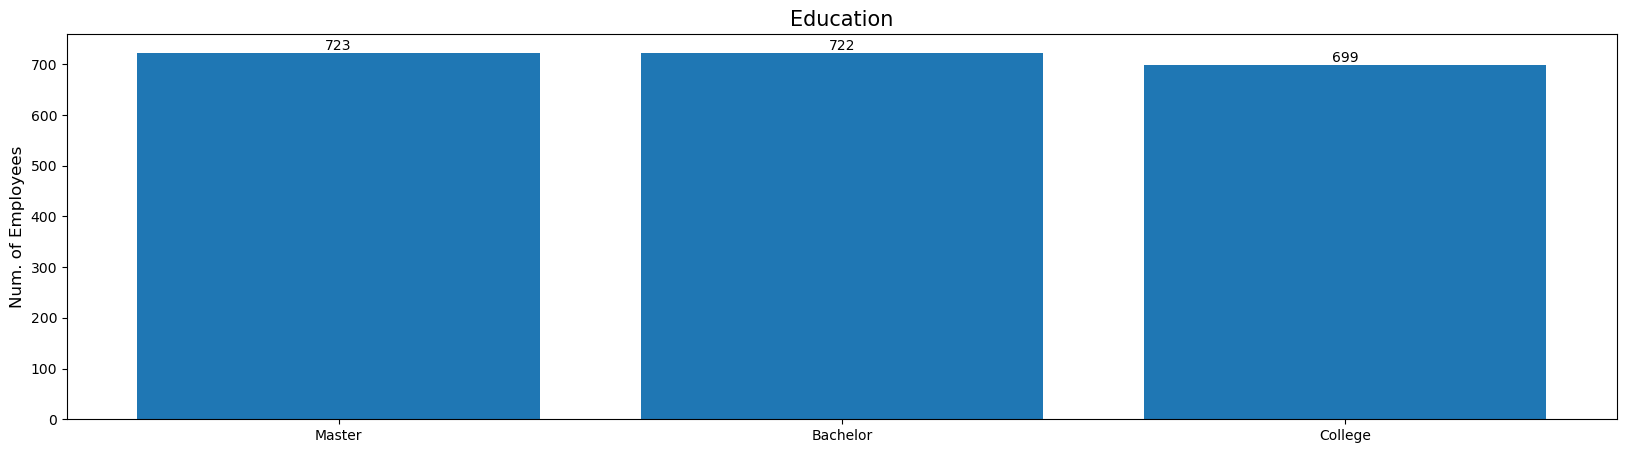

In [396]:
education_data = df["Education"].value_counts(normalize=False)
education_level = education_data.index

plt.figure(figsize=(20, 5))
bars = plt.bar(education_level, education_data)

for bar in bars:                               
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height()}', ha='center', va='bottom', fontsize=10)

plt.title("Education", fontsize=15)
plt.ylabel("Num. of Employees", fontsize=12)
plt.show()

#### **Salary** <a id="p3b7"></a>
- **Key Observation(s)**:
    - The distribution of Salary is right-skewed (more data above median)

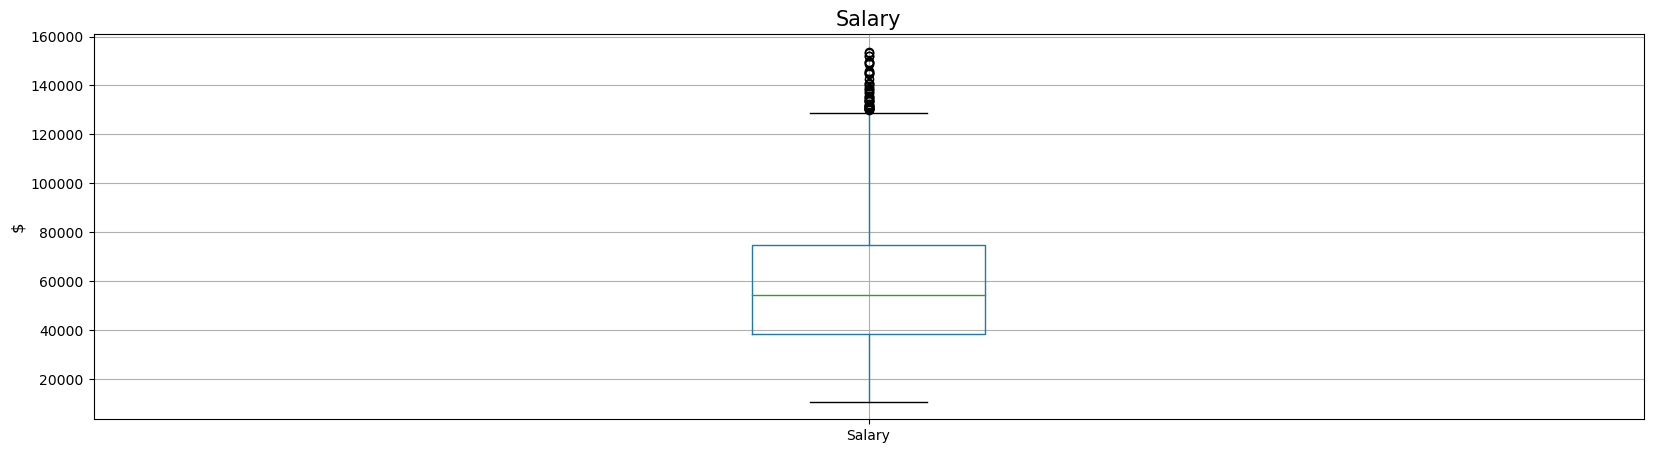

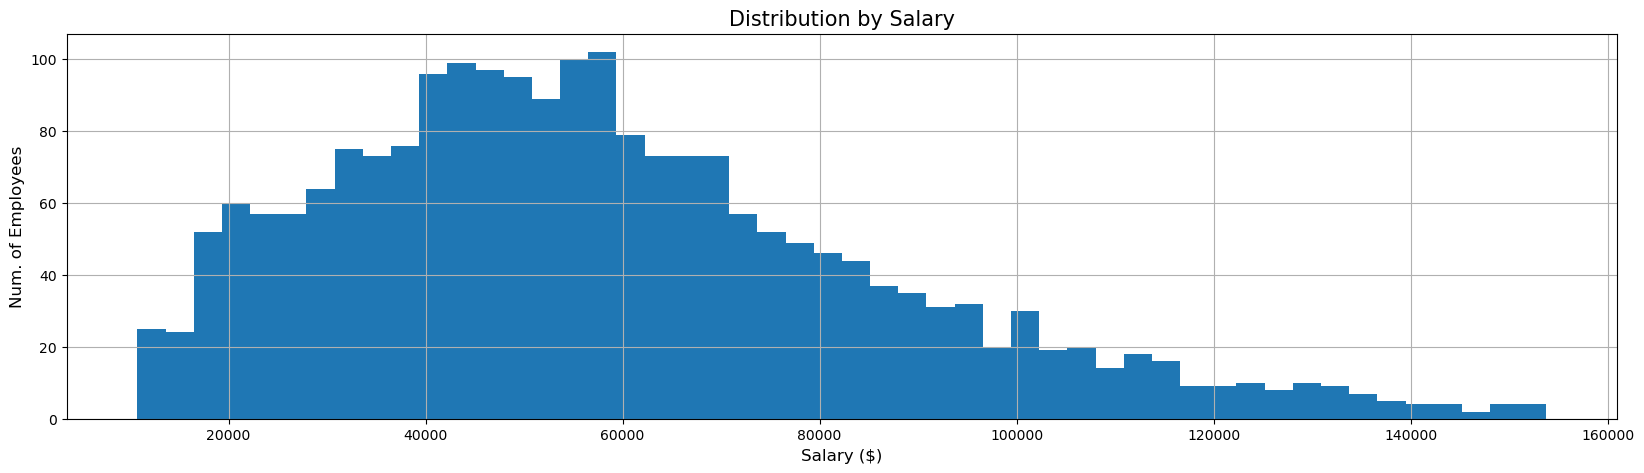

In [397]:
# Boxplot
plt.figure(figsize=(20,5))
df[["Salary"]].boxplot()
plt.title("Salary", fontsize=15)
plt.ylabel("$", fontsize=12)
plt.show()

# Histogram
plt.figure(figsize=(20,5))
plt.title("Distribution by Salary", fontsize=15)
plt.xlabel("Salary ($)", fontsize=12)
plt.ylabel("Num. of Employees", fontsize=12)
df["Salary"].hist(bins=50)    
plt.show()

#### **Join Date** <a id="p3b8"></a>
- **Key Observation(s)**: -

In [398]:
classes = df.Join_Date.unique()
print(f"Values of classes : {classes}")

Values of classes : ['2015-12-24T00:00:00.000000000' '2016-12-07T00:00:00.000000000'
 '2016-01-09T00:00:00.000000000' '2017-07-31T00:00:00.000000000'
 '2017-09-19T00:00:00.000000000' '2017-12-07T00:00:00.000000000'
 '2016-06-29T00:00:00.000000000' '2012-05-28T00:00:00.000000000'
 '2017-10-16T00:00:00.000000000' '2015-11-30T00:00:00.000000000'
 '2015-03-06T00:00:00.000000000' '2016-10-25T00:00:00.000000000'
 '2015-05-12T00:00:00.000000000' '2015-05-25T00:00:00.000000000'
 '2014-10-30T00:00:00.000000000' '2015-05-20T00:00:00.000000000'
 '2016-10-03T00:00:00.000000000' '2017-07-04T00:00:00.000000000'
 '2017-03-07T00:00:00.000000000' '2016-07-01T00:00:00.000000000'
 '2017-05-16T00:00:00.000000000' '2016-12-06T00:00:00.000000000'
 '2017-08-08T00:00:00.000000000' '2016-11-08T00:00:00.000000000'
 '2016-07-04T00:00:00.000000000' '2015-10-20T00:00:00.000000000'
 '2015-07-13T00:00:00.000000000' '2017-09-25T00:00:00.000000000'
 '2017-05-29T00:00:00.000000000' '2015-10-28T00:00:00.000000000'
 '201

#### **Last Work Date** <a id="p3b9"></a>
- **Key Observation(s)**: -

In [399]:
classes = df.Last_Work_Date.unique()
print(f"Values of classes : {classes}")

Values of classes : ['2016-03-11T00:00:00.000000000' '2017-04-27T00:00:00.000000000'
 '2016-03-07T00:00:00.000000000' '2017-12-31T00:00:00.000000000'
 '2017-11-15T00:00:00.000000000' '2016-12-21T00:00:00.000000000'
 '2017-11-25T00:00:00.000000000' '2016-02-22T00:00:00.000000000'
 '2016-07-20T00:00:00.000000000' '2016-04-30T00:00:00.000000000'
 '2017-03-01T00:00:00.000000000' '2017-02-17T00:00:00.000000000'
 '2017-04-26T00:00:00.000000000' '2016-10-27T00:00:00.000000000'
 '2016-05-23T00:00:00.000000000' '2016-11-29T00:00:00.000000000'
 '2017-11-14T00:00:00.000000000' '2017-05-05T00:00:00.000000000'
 '2017-07-29T00:00:00.000000000' '2017-10-16T00:00:00.000000000'
 '2017-03-15T00:00:00.000000000' '2017-02-14T00:00:00.000000000'
 '2016-05-16T00:00:00.000000000' '2016-02-20T00:00:00.000000000'
 '2017-11-24T00:00:00.000000000' '2016-02-27T00:00:00.000000000'
 '2017-01-21T00:00:00.000000000' '2016-12-23T00:00:00.000000000'
 '2017-07-21T00:00:00.000000000' '2016-01-25T00:00:00.000000000'
 '201

#### **Join Designation** <a id="p3b10"></a>
- **Key Observation(s)**: 
    - Employees rarely join with designation level 4 or 5 (1.95%)
    - An employee mostly likely joins with designation level 1 (44.21%)
    - For each subsequent designation level, the employee count at that designation level decreases, with a significant drop between level 3 and 4 

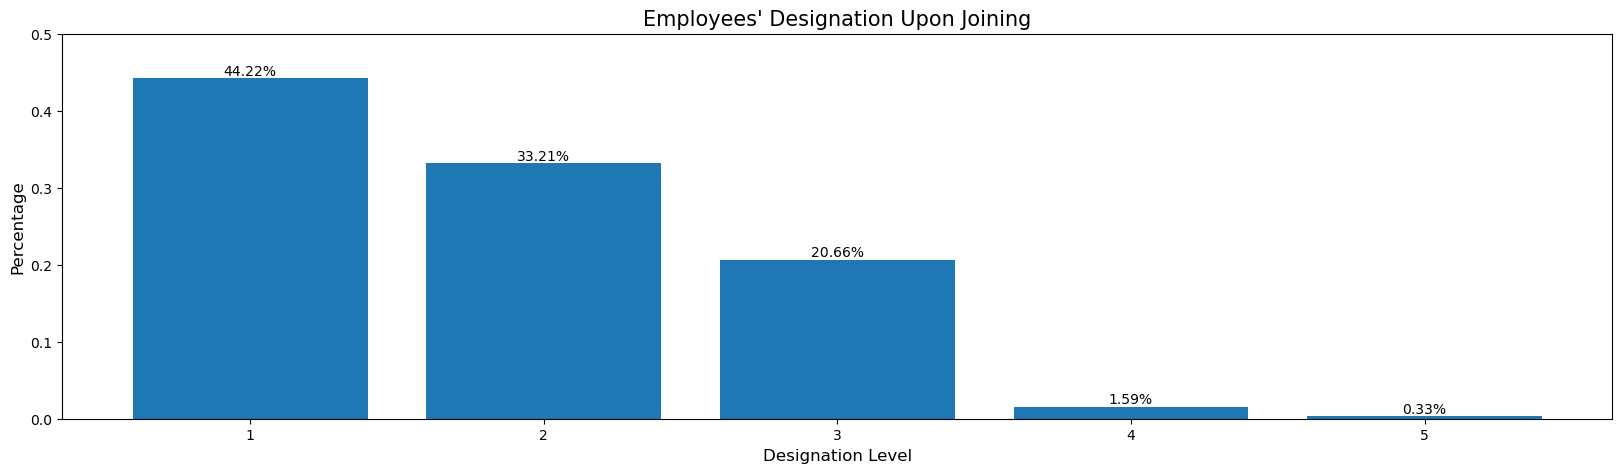

In [400]:
jd_data = df["Join_Designation"].value_counts(normalize=True)
jd_level = jd_data.index

plt.figure(figsize=(20,5))                
bars = plt.bar(jd_level, jd_data)              

for bar in bars:                               
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2%}', ha='center', va='bottom', fontsize=10)

plt.xlabel("Designation Level", fontsize=12)   
plt.ylabel("Percentage", fontsize=12)          
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])
plt.title("Employees' Designation Upon Joining", fontsize=15) 
plt.show()

#### **Designation** <a id="p3b11"></a>
- **Key Observation(s)**: 
    - There is a significant drop in the number of employees at level 1 (11.81%)
    - All other designation levels (2-5) have increased while following a similar trend as Join_Designation 
    - Designation level 3 has the greatest jump (5.02%)
    - Designation level 5 is still the smallest (0.98%), suggesting it is difficult to be promoted to level 5 

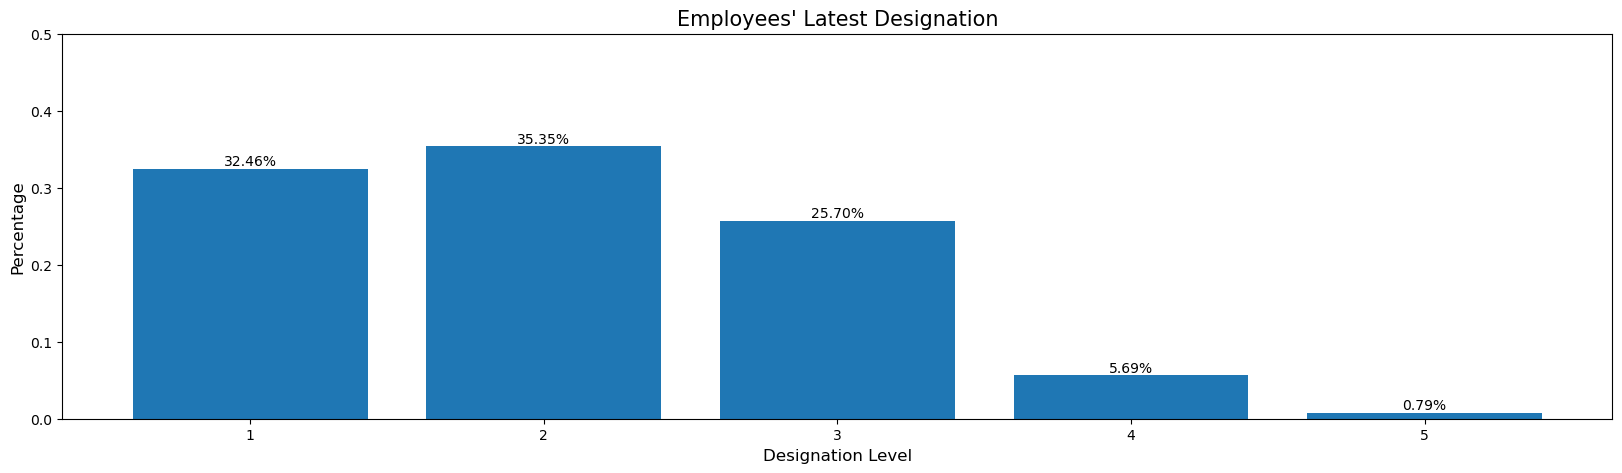

In [401]:
cd_data = df["Designation"].value_counts(normalize=True)
cd_level = cd_data.index

plt.figure(figsize=(20,5))                  
bars = plt.bar(cd_level, cd_data)              

for bar in bars:                               
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2%}', ha='center', va='bottom', fontsize=10)

plt.xlabel("Designation Level", fontsize=12)   
plt.ylabel("Percentage", fontsize=12)          
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])
plt.title("Employees' Latest Designation", fontsize=15)  
plt.show()

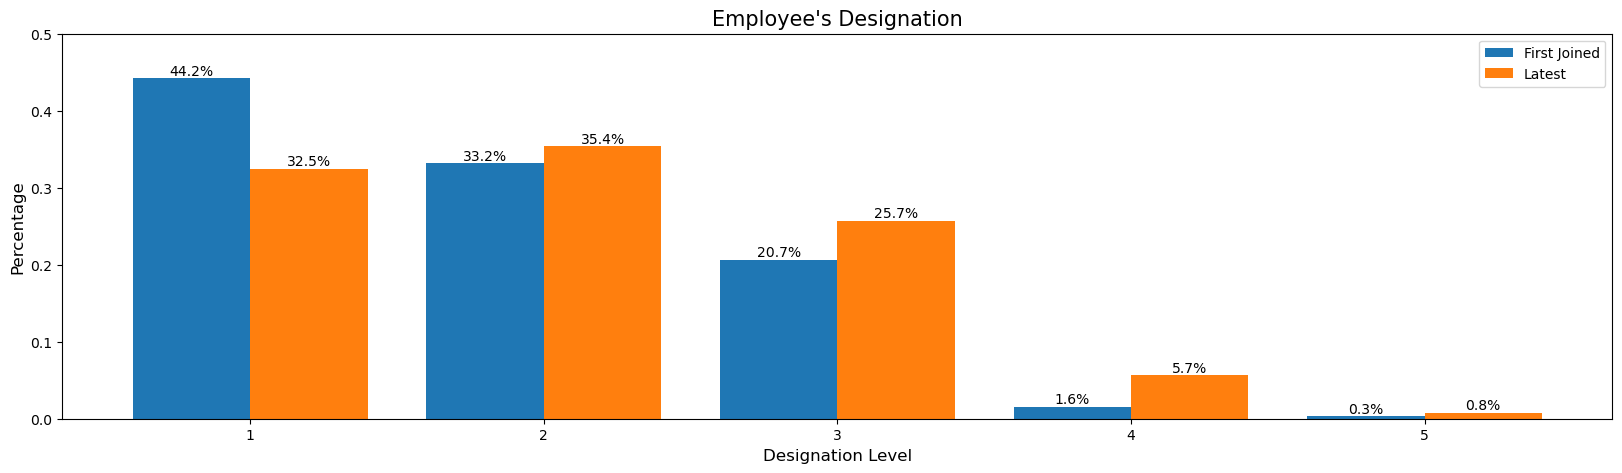

In [402]:
plt.figure(figsize=(20,5)) 

jd_data = df["Join_Designation"].value_counts(normalize=True)
bars1 = plt.bar(jd_data.index - 0.2, jd_data, 0.4, label = 'First Joined') 

for bar in bars1:                               
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.1%}', ha='center', va='bottom', fontsize=10)

cd_data = df["Designation"].value_counts(normalize=True)
bars2 = plt.bar(cd_data.index + 0.2, cd_data, 0.4, label = 'Latest') 
  
for bar in bars2:                               
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.1%}', ha='center', va='bottom', fontsize=10)

plt.xlabel("Designation Level", fontsize=12) 
plt.ylabel("Percentage", fontsize=12)  
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])
plt.legend() 
plt.title("Employee's Designation", fontsize=15)
plt.show() 

#### **Total Sales Accquired** <a id="p3b12"></a>
- **Key Observation(s)**:
    - A significant number of employees (653) accuqired 0 total sales such that the lower quantile and lower bound are both 0
    - Among the outlier data
        - The majority are concentrated between upper bound (0.1x10^8) and 0.4x10^8 total sales
        - There is another grouping between 0.5x10^8 and 0.6x10^8 total sales
        - There is 3 distinct points after 0.6x10^8 total sales
    - The distribution of Total Sales Accquired is right-skewed (more data above median)

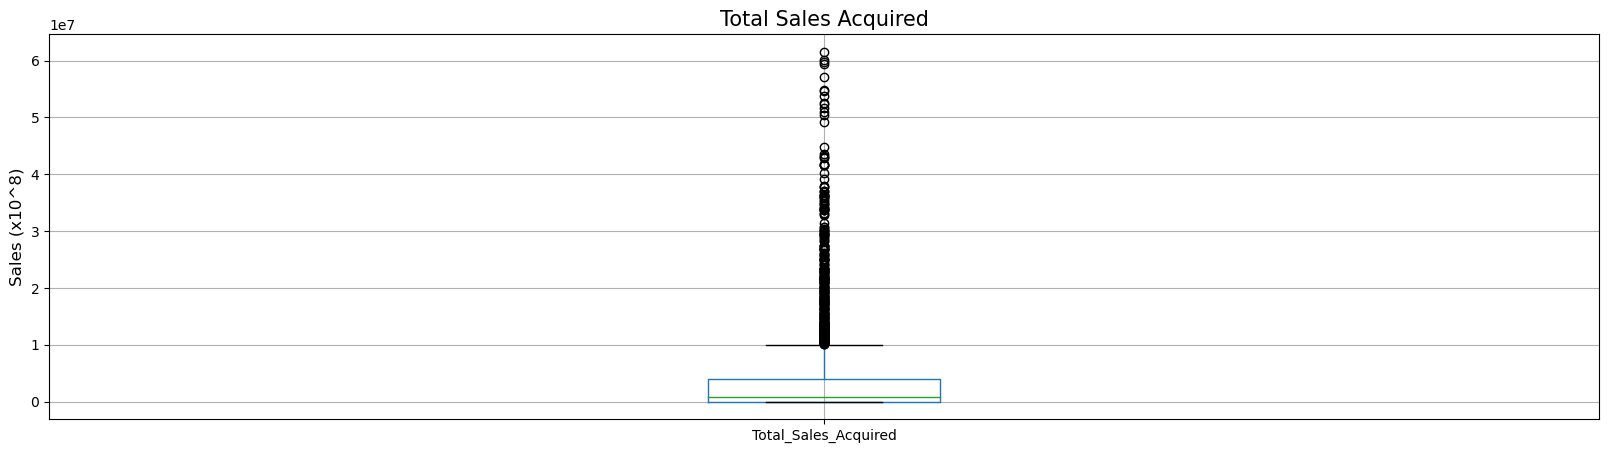

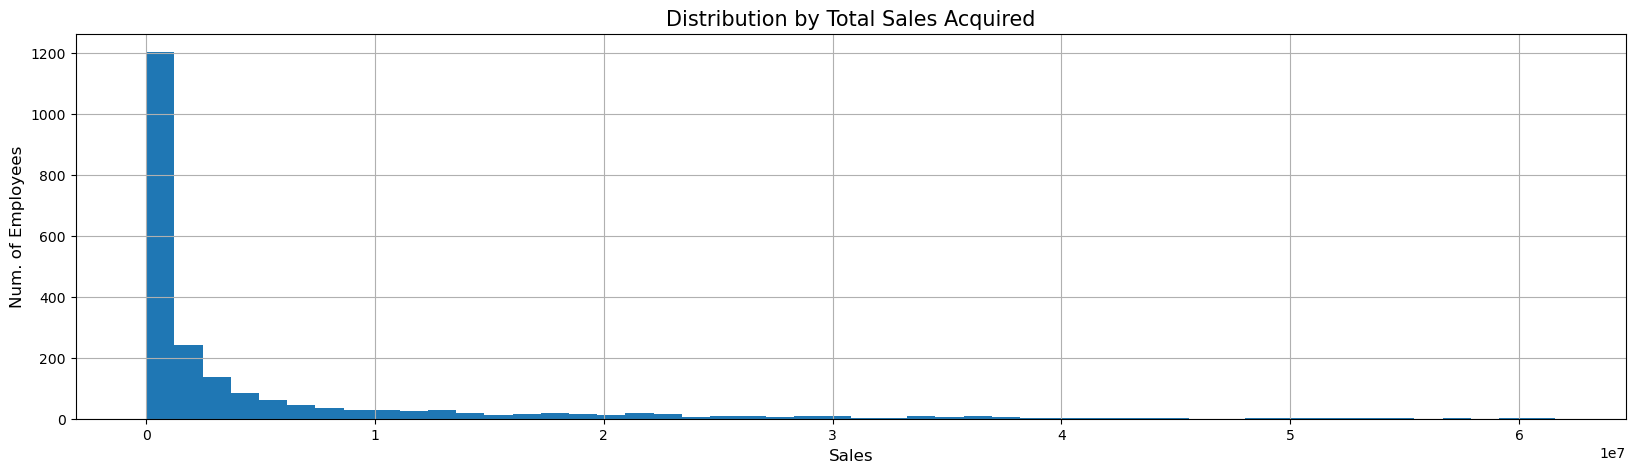

In [403]:
# Boxplot
plt.figure(figsize=(20,5))
df[["Total_Sales_Acquired"]].boxplot()
plt.title("Total Sales Acquired", fontsize=15)
plt.ylabel("Sales (x10^8)", fontsize=12)
plt.show()

# Histogram
plt.figure(figsize=(20,5))
plt.title("Distribution by Total Sales Acquired", fontsize=15)
plt.xlabel("Sales", fontsize=12)
plt.ylabel("Num. of Employees", fontsize=12)
df["Total_Sales_Acquired"].hist(bins=50)    
plt.show()


#### **Quarterly Rating** <a id="p3b13"></a>
- **Key Observation(s)**: 
    - Follows a logarithmic decrease, with a significant drop between rating 1 and 2
    - The majority of employees are given a quarterly rating of 1, emphasising it is difficult to attain a higher rating

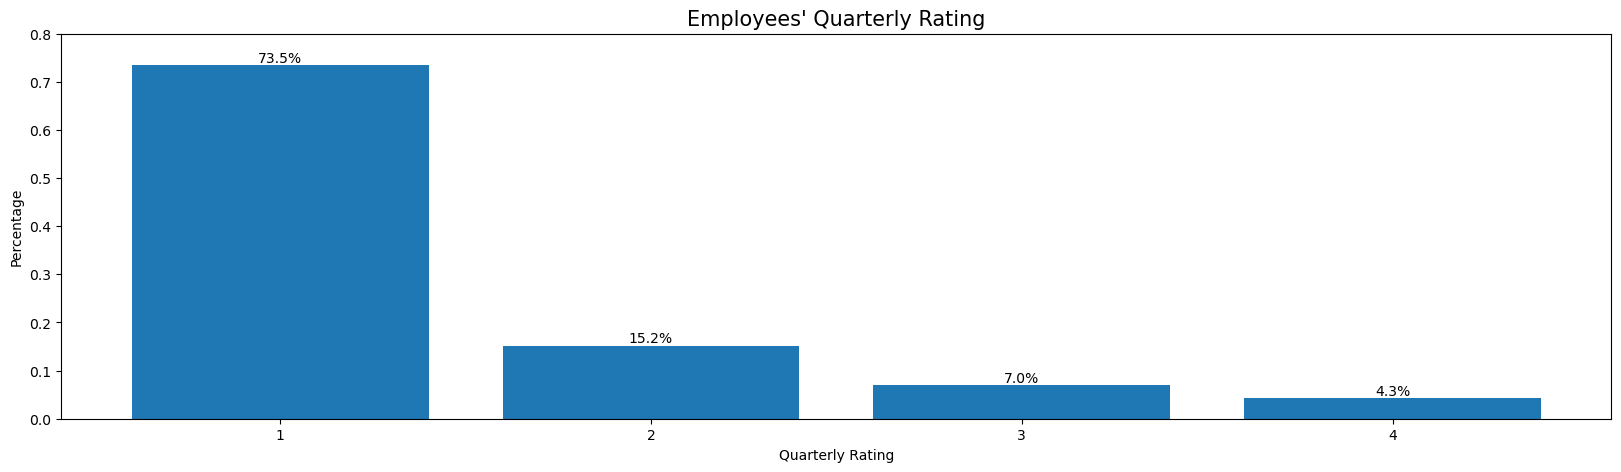

In [404]:
qr_data = df["Quarterly_Rating"].value_counts(normalize=True)
qr_level = qr_data.index

plt.figure(figsize=(20,5))
bars = plt.bar(qr_level, qr_data)

for bar in bars:                               
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.1%}', ha='center', va='bottom', fontsize=10)
    
plt.title("Employees' Quarterly Rating", fontsize=15)
plt.xlabel("Quarterly Rating", fontsize=10)
plt.xticks([1,2,3,4])
plt.ylabel("Percentage", fontsize=10)
plt.yticks(np.arange(0,0.9,0.1))
plt.show()

<a id="part3c"></a> [(Back)](#part3)

### **c.** Perform bi-variate analysis on the variables. You do not need to present the analysis of every pair of variables; only focus on the pairs you believe are worth investigating and explain. For each pair, describe the relationship between the two variables. Use appropriate statistical methods and/or visualizations.

**Response.** 

#### **Age vs Salary** <a id="p3b11"></a>

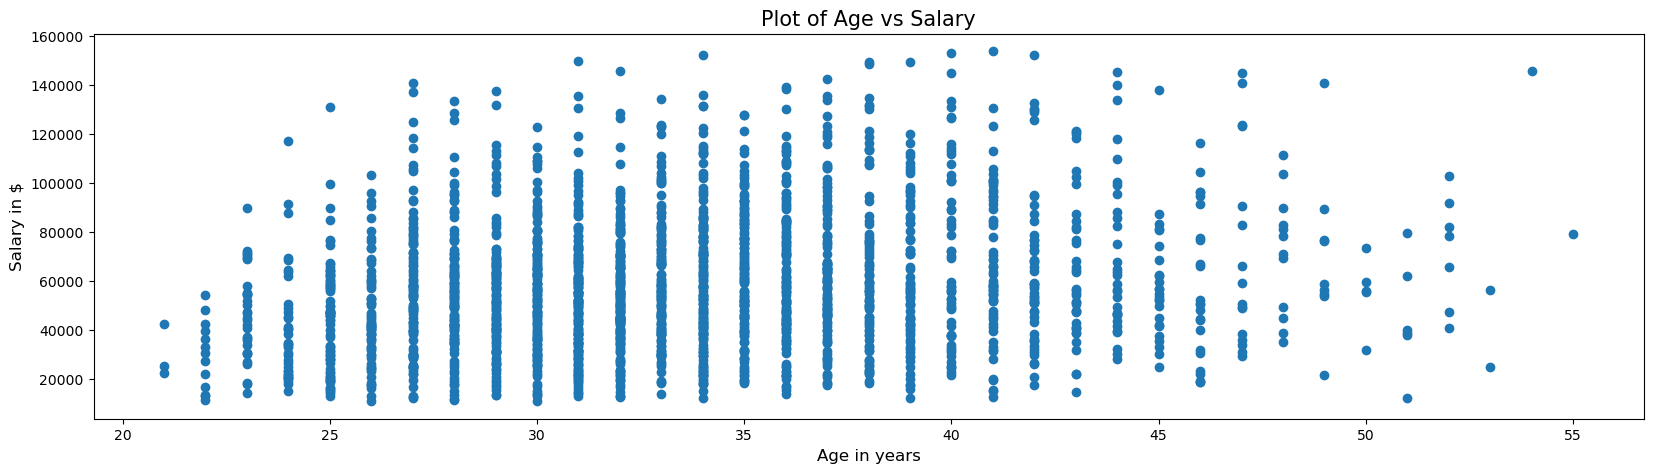

In [405]:
xs = df.Age
ys = df.Salary

plt.figure(figsize=(20,5))
plt.scatter(xs, ys)
plt.title("Plot of Age vs Salary", fontsize=15)
plt.xlabel("Age in years", fontsize=12)
plt.ylabel("Salary in $", fontsize=12)
plt.show()



In [406]:
corr = np.corrcoef(xs, ys)
corr

array([[1.        , 0.20031476],
       [0.20031476, 1.        ]])

In [407]:
cov = np.cov(xs, ys)
cov

array([[3.54523838e+01, 3.33419019e+04],
       [3.33419019e+04, 7.81464734e+08]])

In [408]:
xs.var(), ys.var() 

(35.45238380252273, 781464734.0610298)

#### **City vs Salary** <a id="p3b11"></a>

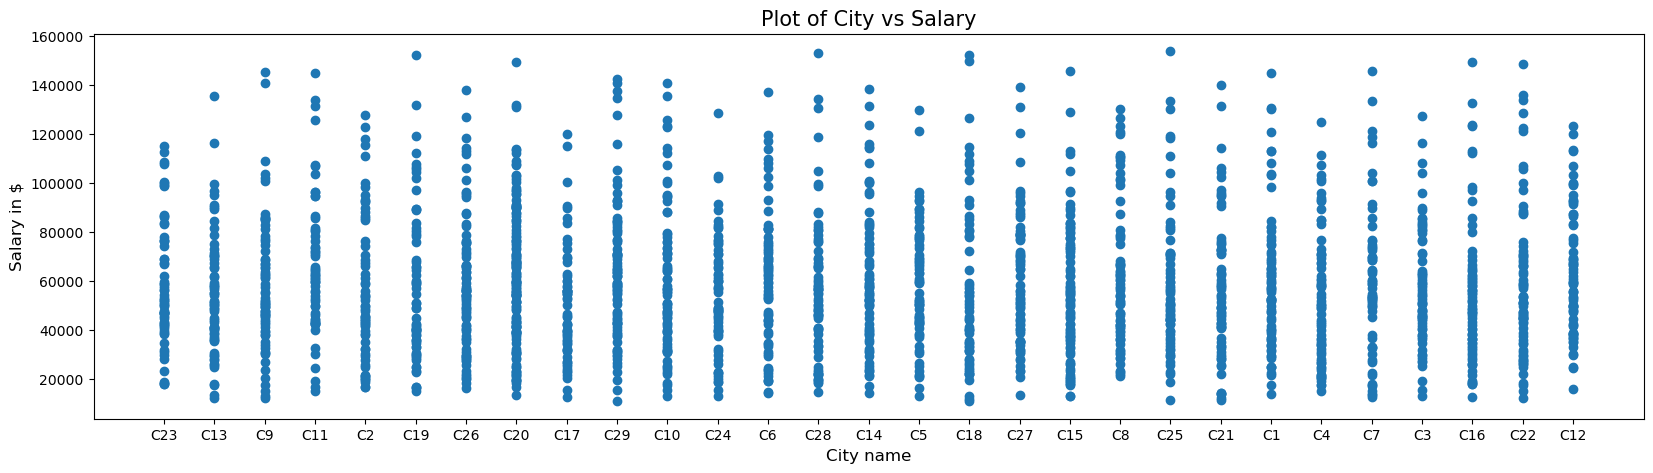

In [409]:
xs = df.City
ys = df.Salary

plt.figure(figsize=(20,5))
plt.scatter(xs, ys)
plt.title("Plot of City vs Salary", fontsize=15)
plt.xlabel("City name", fontsize=12)
plt.ylabel("Salary in $", fontsize=12)
plt.show()

#### **Designation vs Salary** <a id="p3b11"></a>

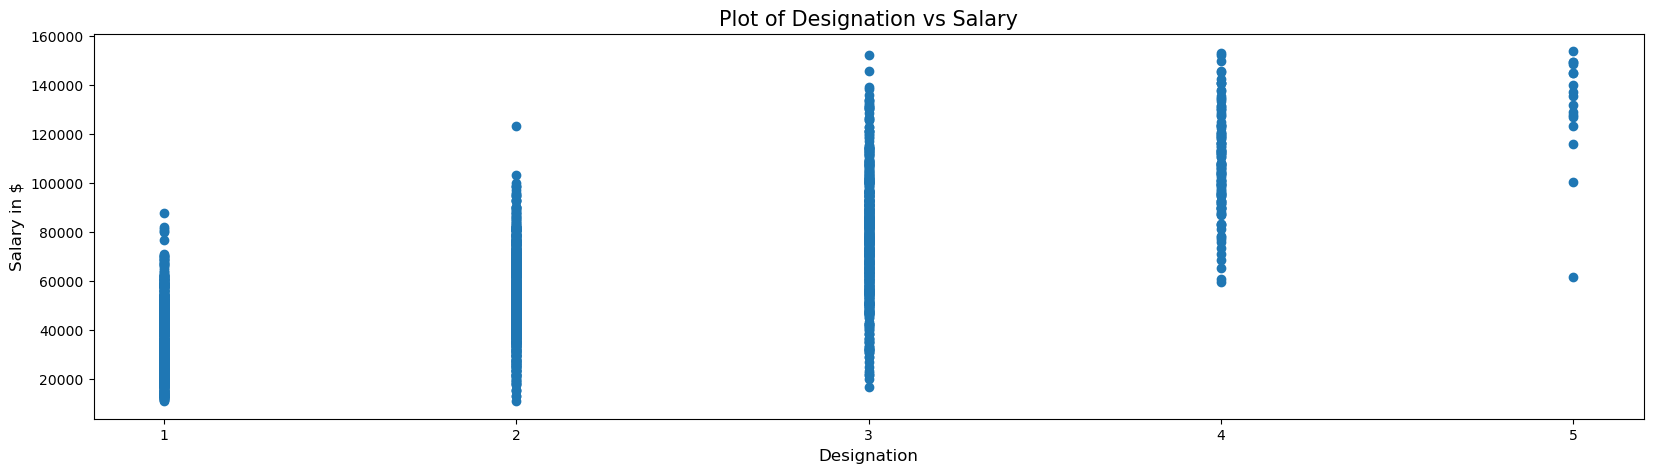

In [410]:
xs = df.Designation
ys = df.Salary

plt.figure(figsize=(20,5))
plt.scatter(xs, ys)
plt.title("Plot of Designation vs Salary", fontsize=15)
plt.xlabel("Designation", fontsize=12)
plt.xticks([1,2,3,4,5])
plt.ylabel("Salary in $", fontsize=12)
plt.show()

#### **Education vs Join Designation** <a id="p3b11"></a>

In [411]:
pd.crosstab(df.Education, df.Join_Designation)

Join_Designation,1,2,3,4,5
Education,,,,,
Bachelor,325,232,153,9,3
College,301,244,137,15,2
Master,322,236,153,10,2


#### **Age vs Designation** <a id="p3b11"></a>

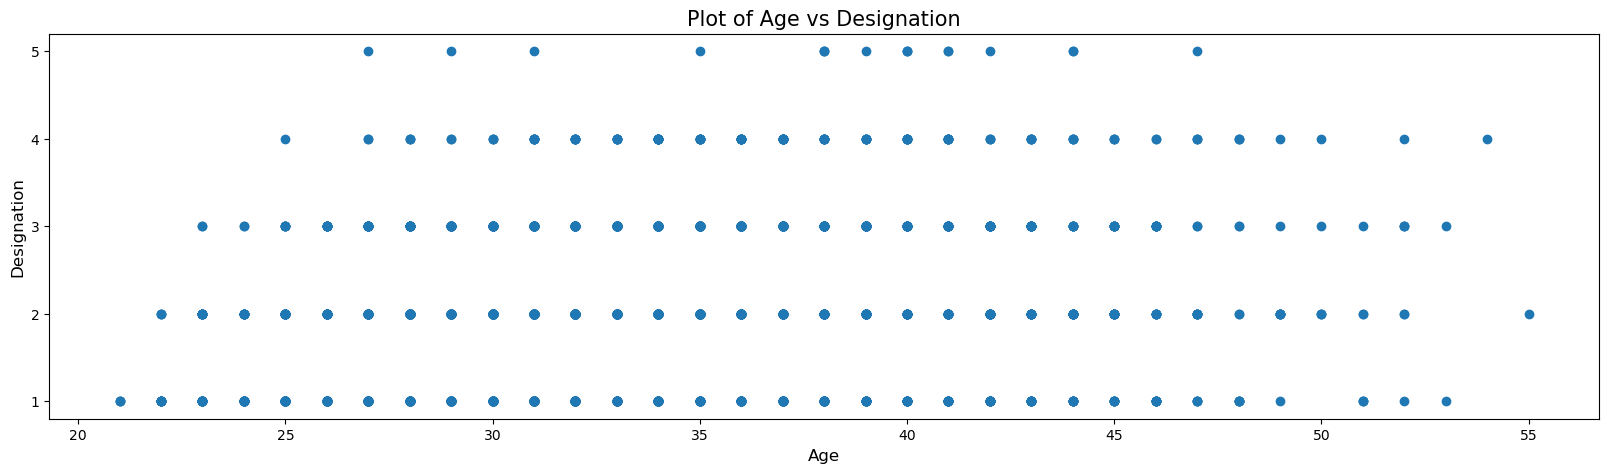

In [412]:
xs = df.Age
ys = df.Designation

plt.figure(figsize=(20,5))
plt.scatter(xs, ys)
plt.title("Plot of Age vs Designation", fontsize=15)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Designation", fontsize=12)
plt.yticks([1,2,3,4,5])
plt.show()

#### **City vs (Designation-JD)** <a id="p3b11"></a>

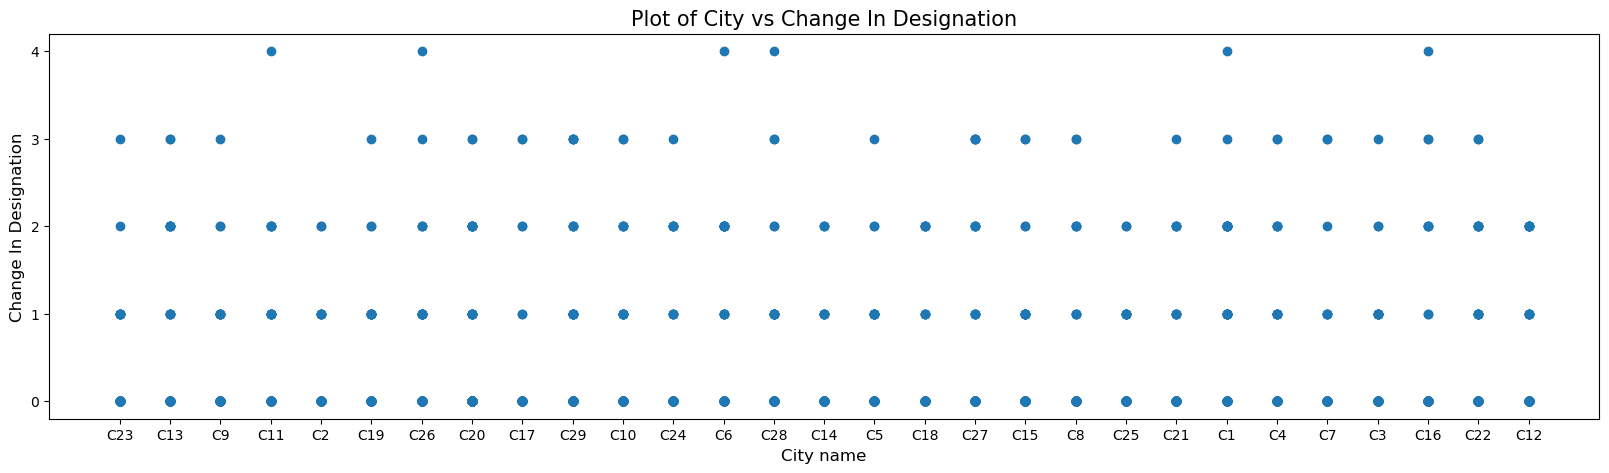

In [413]:
xs = df.City
ys = df.Designation - df.Join_Designation

plt.figure(figsize=(20,5))
plt.scatter(xs, ys)
plt.title("Plot of City vs Change In Designation", fontsize=15)
plt.xlabel("City name", fontsize=12)
plt.ylabel("Change In Designation", fontsize=12)
plt.yticks([0,1,2,3,4])
plt.show()

#### **(LWD-JD) vs (Designation-JD)** <a id="p3b11"></a>

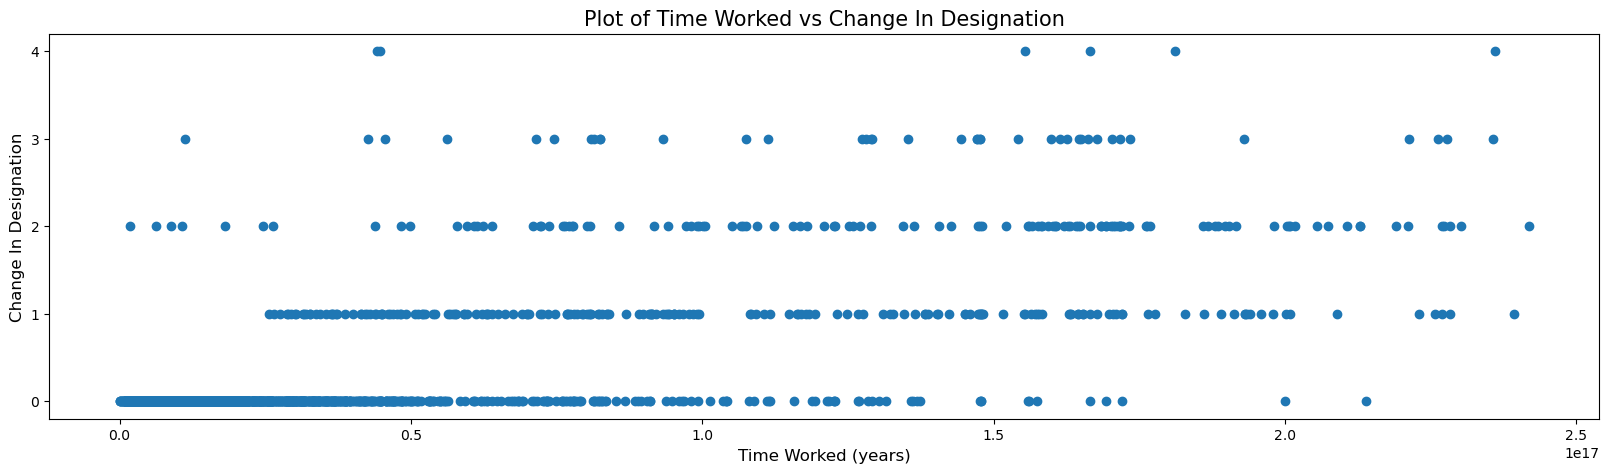

In [415]:
xs = df.Last_Work_Date - df.Join_Date
ys = df.Designation - df.Join_Designation

plt.figure(figsize=(20,5))
plt.scatter(xs, ys)
plt.title("Plot of Time Worked vs Change In Designation", fontsize=15)
plt.xlabel("Time Worked (years)", fontsize=12)
plt.ylabel("Change In Designation", fontsize=12)
plt.yticks([0,1,2,3,4])
plt.show()

[(Back)](#part3)